Github: https://github.com/ipazc/mtcnn

https://towardsdatascience.com/face-detection-using-mtcnn-a-guide-for-face-extraction-with-a-focus-on-speed-c6d59f82d49 

In [1]:
!pip install mtcnn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 21.0 MB/s eta 0:00:00


This implementation requires OpenCV>=4.1 and Keras>=2.0.0 (any Tensorflow supported by Keras will be supported by this MTCNN package)

In [2]:
import mtcnn
print(mtcnn.__version__) 

import cv2 
print(cv2.__version__)

import matplotlib.pyplot as plt
import os 
import random 

0.1.0
4.7.0


In [3]:
!ls -lha kaggle.json
!pip install -q kaggle # installing the kaggle package
!mkdir -p ~/.kaggle # creating .kaggle folder where the key should be placed
!cp kaggle.json ~/.kaggle/ # move the key to the folder
!pwd # checking the present working directory

-rw-r--r-- 1 root root 68 Apr  6 06:43 kaggle.json
/content


In [4]:
# download datasets files from kaggle
!kaggle datasets download -d jessicali9530/celeba-dataset

 99% 1.32G/1.33G [00:10<00:00, 139MB/s]
100% 1.33G/1.33G [00:10<00:00, 135MB/s]


In [5]:
import zipfile 
zip_ref = zipfile.ZipFile('/content/celeba-dataset.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

Shape of image/array: (218, 178, 3)


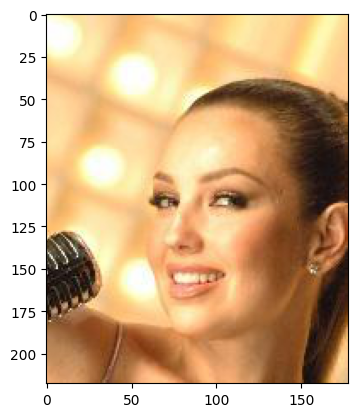

In [10]:
img_dir = '/content/img_align_celeba/img_align_celeba'
img_filename = random.choice(os.listdir(img_dir))
img_path = os.path.join(img_dir, img_filename)

pixels = plt.imread(img_path)
print("Shape of image/array:", pixels.shape)

imgplot = plt.imshow(pixels)
plt.show()

In [11]:
detector = mtcnn.MTCNN()
# detect faces in the image
detector.detect_faces(pixels)

2/2 [==============================] - 0s 14ms/step


1/1 [==============================] - 0s 241ms/step


[{'box': [55, 60, 93, 124],
  'confidence': 0.9997410178184509,
  'keypoints': {'left_eye': (72, 109),
   'right_eye': (109, 110),
   'nose': (76, 132),
   'mouth_left': (69, 155),
   'mouth_right': (102, 155)}}]

The detector returns a list of JSON objects. Each JSON object contains three main keys: 'box', 'confidence' and 'keypoints':

- The bounding box is formatted as [x, y, width, height] under the key 'box'.
- The confidence is the probability for a bounding box to be matching a face.
- The keypoints are formatted into a JSON object with the keys 'left_eye', 'right_eye', 'nose', 'mouth_left', 'mouth_right'. Each keypoint is identified by a pixel position (x, y).

1/1 [==============================] - 0s 49ms/step


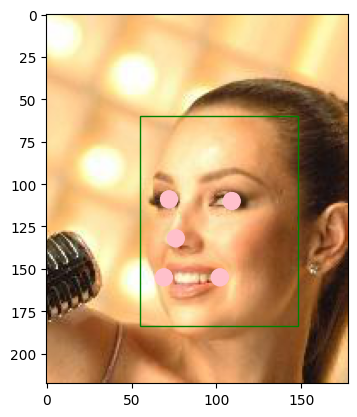

In [12]:
def facebox(filename, result_list):
    img = plt.imread(img_path)
    plt.imshow(img)
    #get the context for drawing boxes
    ax = plt.gca()

    for result in result_list:
        #get coordinates
        x, y, width, height = result['box']
        # create the shape
        rectangle = plt.Rectangle((x, y), width, height, fill = False, color = 'green')
        #draw the box
        ax.add_patch(rectangle)
        for key, value in result['keypoints'].items():
            # create and draw dot
            dot = plt.Circle(value, radius = 5, color = 'pink')
            ax.add_patch(dot)
            # show the plot
        plt.show()
    plt.show()

faces = detector.detect_faces(pixels)
facebox(img_filename, faces)